In [1]:
#Loading the libraries
import pandas as pd
import numpy as np

from sklearn import metrics
import sklearn.metrics as metric
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading data
df0 = pd.read_csv('Overall_Dataset_3years.csv')
df0.head()

,productId,title,profileName,score,userId,purchasedate,Class
0,B000GKXY4S,Crazy Shape Scissor Set,"Carleen M. Amadio ""Lady Dragonfly""",5.0,A1QA985ULVCQOB,2011-08-23,Arts
1,B000GKXY4S,Crazy Shape Scissor Set,Barbara,5.0,ALCX2ELNHLQA7,2012-02-08,Arts
2,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,"O. Brown ""Ms. O. Khannah-Brown""",4.0,A1YUL9PCJR3JTY,2011-11-21,Arts
3,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,Allyn C. Cornell,5.0,A2B6I0N8RNAQXJ,2013-02-15,Arts
4,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,Judith A. Holland,4.0,A2FMZ7LFWTZCJ4,2013-02-12,Arts


In [36]:
df0.isna().sum()

productId       0
title           0
profileName     0
score           0
userId          0
purchasedate    0
Class           0
dtype: int64

In [37]:
#Finding Duplicates
df0.drop_duplicates

<bound method DataFrame.drop_duplicates of           productId                                              title  \
0        B000GKXY4S                            Crazy Shape Scissor Set   
1        B000GKXY4S                            Crazy Shape Scissor Set   
2        B000G6HRZE     Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   
3        B000G6HRZE     Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   
4        B000G6HRZE     Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   
5        B000G6HRZE     Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   
6        B000G6HRZE     Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   
7        B000G6HRZE     Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   
8        B000G6HRZE     Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   
9        B000G6HRZE     Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   
10       B0001DUBWI                Darice - Alphabet Beads 6mm 160/Pkg   
11       B0001DUBWI                Darice - Alphabet Beads 6mm 160/Pk

In [38]:
df0.shape

(771725, 7)

In [39]:
#Running on a sample dataset because of processor capibilities
df = df0.sample(5000)
df = df[['productId','userId','score']]

In [40]:
df.shape

(5000, 3)

In [9]:
df.dropna().shape

(5000, 3)

In [41]:
#Converting datatypes into appropriate formats
df['productId'] = df['productId'].astype(str)
df['userId'] = df['userId'].astype(str)
df['score'] = df['score'].astype(float)

In [42]:
num_users = len(df['userId'].unique())
num_items = len(df['productId'].unique())

In [43]:
num_items

3948

In [44]:
#Sparsity of dataset in %
sparsity=1.0-len(df.score)/float(num_users*num_items)
print( 'The sparsity level of the dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of the dataset is 99.97062249982784 %


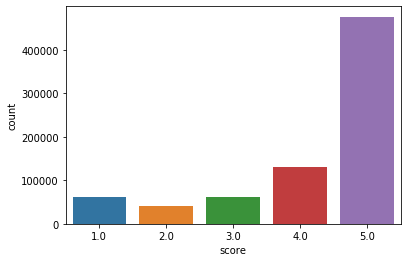

In [7]:
#plotting count of bookRating
sns.countplot(data=df0 , x='score')
plt.show()

In [6]:
mean_rating_of_user = df0.groupby('userId').apply(lambda x: x['score'].mean())

Text(0, 0.5, 'number of Customers')

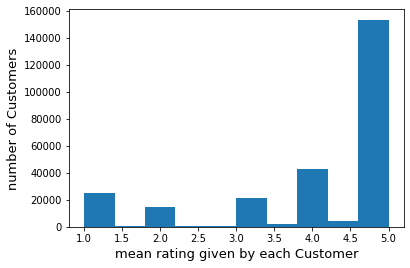

In [7]:
#Plotting mean ratings
fig = plt.figure(figsize=(6,4))
ax  = fig.add_subplot(111)
ax.hist(mean_rating_of_user)
ax.set_xlabel('mean rating given by each Customer', fontsize=13)
ax.set_ylabel('number of Customers', fontsize=13)

In [45]:
#Creating a utilitu Matrix
util_df=pd.pivot_table(data=df,values='score',index='userId',columns='productId')

In [46]:
util_df

productId,B00000J3LO,B00000JBNS,B00000JBNX,B00000JF53,B00000JF55,B00000K135,B00001N2QU,B00001W0KA,B00001XDVZ,B00002JV62,...,B000RSQMNE,B000S0B9ZC,B000S11SOS,B000ST986A,B000TDRHG8,B000TF9LZG,B000TKQAJQ,B000TMDYRU,B000UN04VM,B003L20ICO
userId,,,,,,,,,,,,,,,,,,,,,
A01332583VV0P3635P6I6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A013942629PJM8W7LT8ZT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A06569922Q7WV3X58NDMZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10068T63SXIDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1015X1FQJWP9C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1027EV8A9PV1O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A102NV8IBZRDEZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A103MBXNOQLK2H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A103VBHAW6E5RG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#filling the na values with a zero score
util_df = util_df.fillna(0)
util_df

productId,B00000J3LO,B00000JBNS,B00000JBNX,B00000JF53,B00000JF55,B00000K135,B00001N2QU,B00001W0KA,B00001XDVZ,B00002JV62,...,B000RSQMNE,B000S0B9ZC,B000S11SOS,B000ST986A,B000TDRHG8,B000TF9LZG,B000TKQAJQ,B000TMDYRU,B000UN04VM,B003L20ICO
userId,,,,,,,,,,,,,,,,,,,,,
A01332583VV0P3635P6I6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A013942629PJM8W7LT8ZT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A06569922Q7WV3X58NDMZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10068T63SXIDT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1015X1FQJWP9C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1027EV8A9PV1O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A102NV8IBZRDEZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A103MBXNOQLK2H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A103VBHAW6E5RG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
#Cosine metric
cosine_sim = 1-pairwise_distances(util_df, metric="cosine")

In [49]:
pd.DataFrame(cosine_sim)

,0,1,2,3,4,5,6,7,8,9,...,4301,4302,4303,4304,4305,4306,4307,4308,4309,4310
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#Pearson Metric
pearson_sim = 1-pairwise_distances(util_df, metric="correlation")

In [51]:
pd.DataFrame(pearson_sim)

,0,1,2,3,4,5,6,7,8,9,...,4301,4302,4303,4304,4305,4306,4307,4308,4309,4310
0,1.000000,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,...,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253
1,-0.000253,1.000000,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,...,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253
2,-0.000253,-0.000253,1.000000,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,...,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253
3,-0.000253,-0.000253,-0.000253,1.000000,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,...,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253
4,-0.000253,-0.000253,-0.000253,-0.000253,1.000000,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,...,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253
5,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,1.000000,-0.000253,-0.000253,-0.000253,-0.000253,...,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253
6,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,1.000000,-0.000253,-0.000253,-0.000253,...,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253
7,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,1.000000,-0.000253,-0.000253,...,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253
8,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,1.000000,-0.000253,...,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253
9,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,1.000000,...,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253


In [81]:
#https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/neighbors/classification.py
#Finding the similar users - Pearson
#This function finds k similar Customers given the userId and utility matrix util_df
#-----------------------------------------------------------------------------------------
def findksimilarusers(userId, score, metric = 'correlation', k=5):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(score)

    distances, indices = model_knn.kneighbors(score.iloc[userId, :].values.reshape(1, -1), n_neighbors = k)
    similarities = 1-distances.flatten()
    print ('{0} most similar users for User {1}:\n'.format(k,userId))
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == userId:
            continue;

        else:
            print ('{0}: User Index {1}, with similarity of {2}'.format(i, indices.flatten()[i]+1, similarities.flatten()[i]))
            
    return similarities,indices

In [82]:
#Similar user output using cosine metric
similarities,indices = findksimilarusers(99,util_df, metric='cosine')

5 most similar users for User 99:

0: User Index 1024, with similarity of 1.0
1: User Index 100, with similarity of 1.0
2: User Index 2878, with similarity of 0.0
3: User Index 2876, with similarity of 0.0
4: User Index 2874, with similarity of 0.0


In [78]:
#Similar user output using pearson metric
similarities,indices = findksimilarusers(99,util_df, metric='correlation')

5 most similar users for User 99:

0: User Index 100, with similarity of 1.0
1: User Index 1024, with similarity of 0.9999999999998896
2: User Index 2811, with similarity of -0.0002533569799847424
3: User Index 2809, with similarity of -0.0002533569799847424
4: User Index 2807, with similarity of -0.0002533569799847424


In [87]:
#https://stackoverflow.com/questions/47873498/sklearn-nearest-neighbors-and-unseen-data
#Finding similar products 
#----------------------------------------------------------------
def findksimilaritems(productId, score, metric='correlation', k=5):
    similarities=[]
    indices=[]    
    ratings=score.T
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(score)

    distances, indices = model_knn.kneighbors(score.iloc[productId, :].values.reshape(1, -1), n_neighbors = k)
    similarities = 1-distances.flatten()
    print ('{0} most similar items for item {1}:\n'.format(k,productId))
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == productId:
            continue;

        else:
            print ('{0}: Item Index : {1} , with similarity of {2}'.format(i,indices.flatten()[i]+1, similarities.flatten()[i]))


    return similarities,indices

In [88]:
similarities,indices=findksimilaritems(99,util_df)

5 most similar items for item 99:

0: Item Index : 100 , with similarity of 1.0
1: Item Index : 1024 , with similarity of 0.9999999999998896
2: Item Index : 2811 , with similarity of -0.0002533569799847424
3: Item Index : 2809 , with similarity of -0.0002533569799847424
4: Item Index : 2807 , with similarity of -0.0002533569799847424


In [12]:
mean_rating = df0['score'].mean()

We can get then root mean square error in this prediction by computing by getting the non-zero rating values in the matrices using the above method and taking the square of the difference in these values from the mean_rating,

In [13]:
base_rmse = np.sqrt(pow(df0['score']-mean_rating, 2).mean())
print("RMSE = {}".format(base_rmse))

RMSE = 1.2592794684436854
